In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, mean_squared_error, mean_absolute_error, confusion_matrix
import seaborn as sns
import itertools

In [8]:
# Define directories
train_dir = 'Documents/LAWAL KHADIJAH/train'
valid_dir = 'Documents/LAWAL KHADIJAH/valid'
test_dir = 'Documents/LAWAL KHADIJAH/test'

In [9]:
# ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Load datasets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


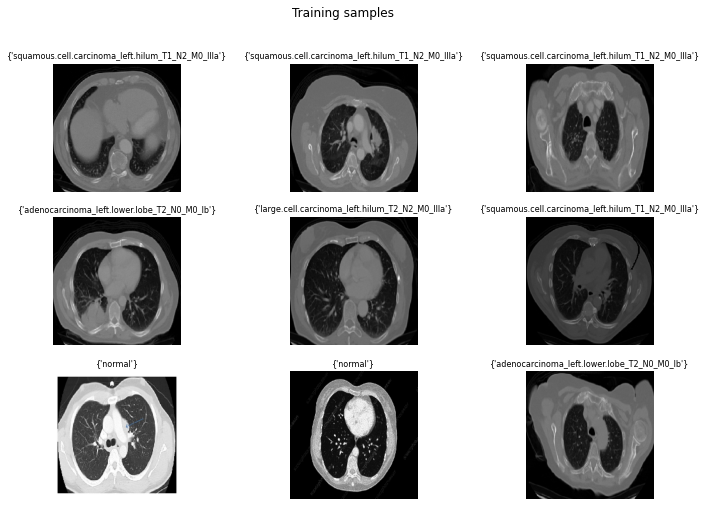

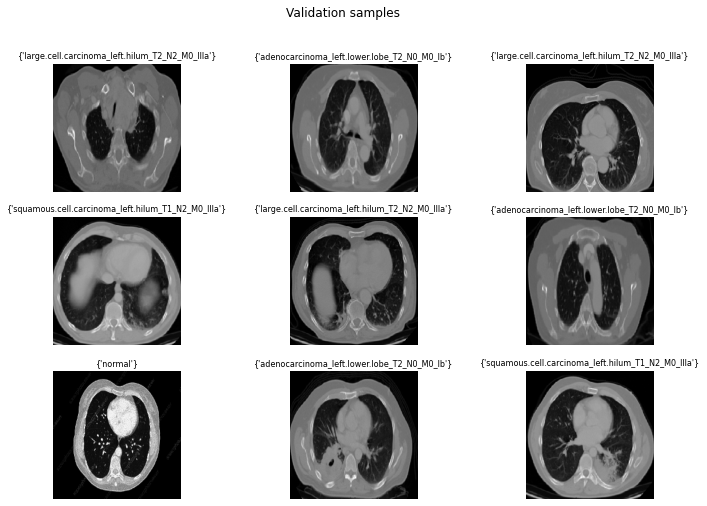

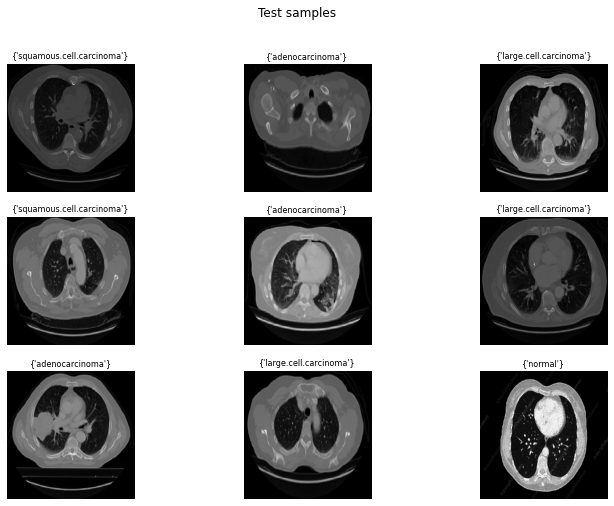

In [11]:
def plot_images(generator, title):
    x, y = next(generator)
    class_indices = {v: k for k, v in generator.class_indices.items()}
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x[i])
        plt.title({class_indices[np.argmax(y[i])]}, fontsize = 8)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot samples from each dataset
plot_images(train_generator, "Training samples")
plot_images(valid_generator, "Validation samples")
plot_images(test_generator, "Test samples")

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
20/20 [==============================] - 39s 2s/step - loss: 2.4619 - accuracy: 0.3573 - val_loss: 0.9527 - val_accuracy: 0.5972
Epoch 2/30
20/20 [==============================] - 34s 2s/step - loss: 0.6977 - accuracy: 0.7357 - val_loss: 0.6357 - val_accuracy: 0.7222
Epoch 3/30
20/20 [==============================] - 34s 2s/step - loss: 0.4529 - accuracy: 0.8140 - val_loss: 0.6731 - val_accuracy: 0.7917
Epoch 4/30
20/20 [==============================] - 35s 2s/step - loss: 0.3362 - accuracy: 0.8760 - val_loss: 0.5338 - val_accuracy: 0.8194
Epoch 5/30
20/20 [==============================] - 35s 2s/step - loss: 0.1616 - accuracy: 0.9380 - val_loss: 0.5538 - val_accuracy: 0.7917
Epoch 6/30
20/20 [==============================] - 34s 2s/step - loss: 0.1443 - accuracy: 0.9608 - val_loss: 0.8075 - val_accuracy: 0.7500
Epoch 7/30
20/20 [==============================] - 34s 2s/step - loss: 0.1645 - accuracy: 0.9429 - val_loss: 0.6157 - val_accuracy: 0.8056
Epoch 8/30
20/20 [==

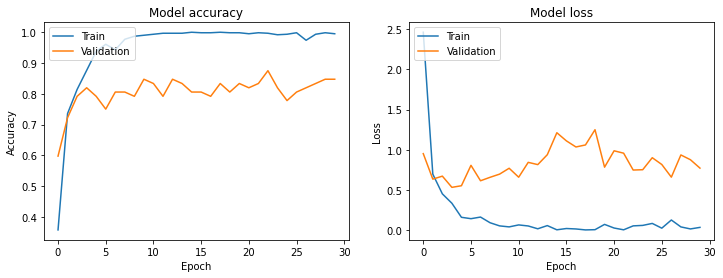

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [15]:
train_loss, train_acc = model.evaluate(train_generator)
print(f'Training loss: {train_loss}')
print(f'Training accuracy: {train_acc}')

y_true = train_generator.classes
y_pred = np.argmax(model.predict(train_generator), axis=-1)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

20/20 [==============================] - 12s 611ms/step - loss: 0.0070 - accuracy: 0.9984
Training loss: 0.0070015001110732555
Training accuracy: 0.9983686804771423
Precision: 0.2659775253154338
Recall: 0.265905383360522
MSE: 2.740619902120718
MAE: 1.295269168026101
RMSE: 1.6554817734184566


In [16]:
val_loss, val_acc = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_acc}')

y_true = valid_generator.classes
y_pred = np.argmax(model.predict(valid_generator), axis=-1)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

3/3 [==============================] - 2s 393ms/step - loss: 0.7729 - accuracy: 0.8472
Validation loss: 0.7728953957557678
Validation accuracy: 0.8472222089767456
Precision: 0.3111598440545809
Recall: 0.3055555555555556
MSE: 2.375
MAE: 1.1805555555555556
RMSE: 1.541103500742244


In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

10/10 [==============================] - 18s 2s/step - loss: 2.8144 - accuracy: 0.5302
Test loss: 2.814429759979248
Test accuracy: 0.5301587581634521
Precision: 0.3129708200034788
Recall: 0.23809523809523808
MSE: 2.4857142857142858
MAE: 1.2603174603174603
RMSE: 1.5766148184367308


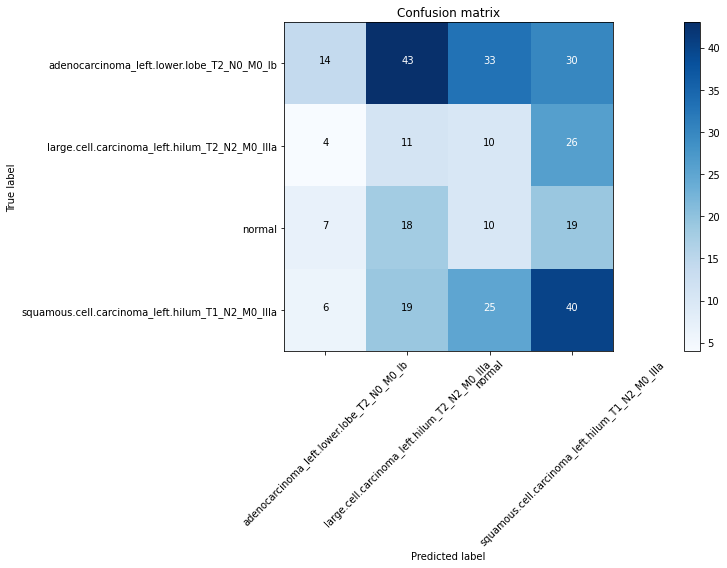

In [18]:
cm = confusion_matrix(y_true, y_pred)
cm_plot_labels = list(valid_generator.class_indices.keys())

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, cm_plot_labels)
plt.show()

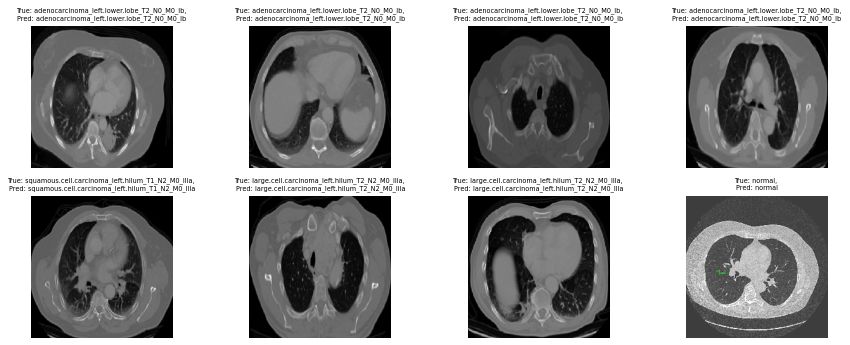

In [19]:
def plot_predictions(generator, model, num_images=8):
    x, y = next(generator)
    predictions = model.predict(x)
    class_indices = {v: k for k, v in generator.class_indices.items()}
    plt.figure(figsize=(15, 12))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i])
        true_label = class_indices[np.argmax(y[i])]
        pred_label = class_indices[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}, \nPred: {pred_label}', fontsize = 6.5)
        plt.axis('off')
    plt.show()

plot_predictions(valid_generator, model)

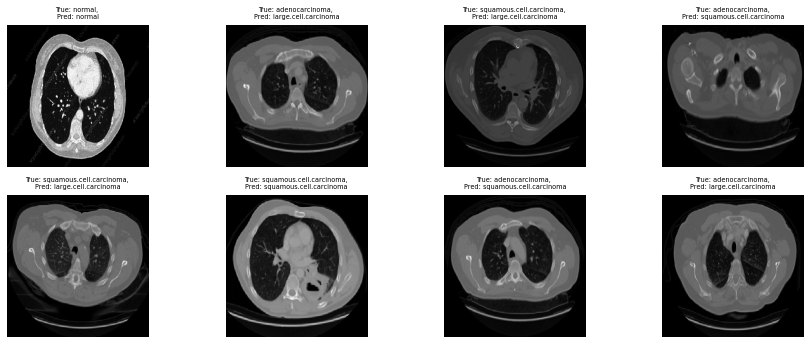

In [20]:
def plot_predictions(generator, model, num_images=8):
    x, y = next(generator)
    predictions = model.predict(x)
    class_indices = {v: k for k, v in generator.class_indices.items()}
    plt.figure(figsize=(15, 12))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i])
        true_label = class_indices[np.argmax(y[i])]
        pred_label = class_indices[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}, \nPred: {pred_label}', fontsize = 6.5)
        plt.axis('off')
    plt.show()

plot_predictions(test_generator, model)

In [21]:
# For multi-class, sensitivity per class
from sklearn.metrics import recall_score
val_loss, val_acc = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_acc}')

y_true = valid_generator.classes
y_pred = np.argmax(model.predict(valid_generator), axis=-1)

# Calculate sensitivity for each class
sensitivities = recall_score(y_true, y_pred, average=None)
print(f"Sensitivities: {sensitivities}")

# If you want the average sensitivity
average_sensitivity = recall_score(y_true, y_pred, average='macro')  # or 'weighted'
print(f"Average Sensitivity: {average_sensitivity}")

3/3 [==============================] - 1s 267ms/step - loss: 0.7729 - accuracy: 0.8472
Validation loss: 0.7728953957557678
Validation accuracy: 0.8472222089767456
Sensitivities: [0.34782609 0.14285714 0.15384615 0.33333333]
Average Sensitivity: 0.24446567924828794


In [22]:
y_true = train_generator.classes
y_pred = np.argmax(model.predict(train_generator), axis=-1)

# Calculate sensitivity for each class
sensitivities = recall_score(y_true, y_pred, average=None)
print(f"Sensitivities: {sensitivities}")

# If you want the average sensitivity
average_sensitivity = recall_score(y_true, y_pred, average='macro')  # or 'weighted'
print(f"Average Sensitivity: {average_sensitivity}")

Sensitivities: [0.28717949 0.17391304 0.2027027  0.23225806]
Average Sensitivity: 0.22401332446914496


In [23]:
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Calculate sensitivity for each class
sensitivities = recall_score(y_true, y_pred, average=None)
print(f"Sensitivities: {sensitivities}")

# If you want the average sensitivity
average_sensitivity = recall_score(y_true, y_pred, average='macro')  # or 'weighted'
print(f"Average Sensitivity: {average_sensitivity}")

Sensitivities: [0.10833333 0.31372549 0.18518519 0.4       ]
Average Sensitivity: 0.25181100217864927
